## AQUA RESCAN: WATER QUALITY MODEL

Aqua Rescan is a user-friendly tool that helps you know if water is safe to drink. It uses a smart machine learning model called MLP (Multi-Layer Perceptron) to analyze data and make accurate predictions. All the data it learns from is stored in the data folder (filename: water_potability.csv). By studying patterns in the data, Aqua Rescan can classify water as either potable (safe to drink) or not. This makes it a valuable tool for ensuring clean and safe water for everyone.

## DATA

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

### Machine Learning Task:
This dataset is suitable for a supervised binary classification task, where machine learning models can be trained to predict water potability based on the provided water quality attributes. The models aim to classify water samples as potable (1) or not potable (0).



## Exploratory Data Analysis (EDA)

EDA is a crucial aspect of data science that helps in understanding the underlying structure of the data. It involves analyzing and summarizing data visually and statistically to uncover patterns or relationships. The main goals of EDA include:

- Gaining a deeper understanding of the data
- Identifying data quality issues
- Developing initial insights and hypotheses
- Selecting features for modeling or further analysis

## How to Perform Exploratory Data Analysis (EDA):

I. Data Collection
II. Importing Libraries
III. Data Cleaning
IV. Data Exploration
V. Data Analysis

### II.Import the modules

Since we have already collected our data we are going to start by importing all the needed modules for now. We might add more modules as we continue though the model traing by the way.

In [1]:
# import modules
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-06-18 07:33:03.169663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading and Read the dataset

In [2]:
# read the csv
df = pd.read_csv('data/water_potability.csv')

# number of lows and columns
rows = df.shape[0]
columns = df.shape[1]

# print the number of rows and columns
print('Number of rows: ', rows)
print('Number of columns: ', columns)

# view the first 5 rows
df.head()

Number of rows:  3276
Number of columns:  10


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## III. DATA CLEANING

### Check the missing data

Dealing with missing values is a crucial aspect of data cleaning and preprocessing, as missing data can lead to biased analysis and inaccurate results. 

In [3]:
# check for missing values
missing_values = df.isnull().sum()

# print the missing values
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


#### Replace missing values with the mean of the columns

Since we have a significant amount of missing data. We can't afford to lose entire rows or columns, we are going to impute missing values with reasonable estimates.

Let us use the mean imputation method.

In [4]:
# replace missing values with the column's mean
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# check for missing values again
missing_values = df.isnull().sum()

# print the updated missing values
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Now that we have cleaned our data and no longer have missing values.

Plus we need all the data in all columns meaning we want be droping no column for this dataset. <br>
We want our model to learn from every feature we have

## IV. Data Exploration:
Exploring the data is the next step in the EDA process. It helps to identify patterns and trends and forms the basis of the data analysis phase.

## DATA VISUALIZATION
Data Visualization represents the text or numerical data in a visual format, which makes it easy to grasp the information the data express. We, humans, remember the pictures more easily than readable text, so Python provides us various libraries for data visualization like matplotlib, seaborn, plotly, etc.

### 1. pie chart

Let us check about potability, what is the percentage of potable water and non-potable water from our water samples.

<Axes: ylabel='count'>

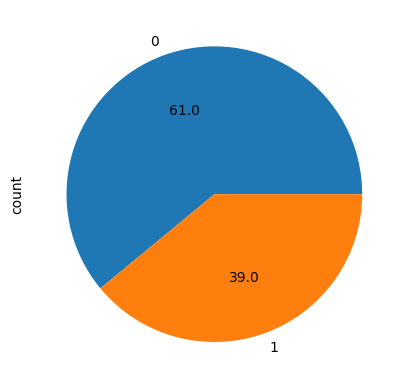

In [5]:
# plot the pie chart
df['Potability'].value_counts().plot(kind='pie', autopct='%.1f')

This shows that the potable water from our water samples is 39% of the overall water sample.

## 2. Correlation Map

Each cell in a correlation map contains a number representing the correlation coefficient between two variables.

  - Positive correlation coefficients range from 0 to 1, where 0 indicates no correlation, and 1 indicates a perfect positive correlation.

  - Negative correlation coefficients range from 0 to -1, where 0 indicates no correlation, and -1 indicates a perfect negative correlation.

  - The strength of the correlation can be inferred from the magnitude of the correlation coefficient. The closer the coefficient is to 1 or -1, the stronger the correlation.

Correlation maps can help identify patterns of association between variables and guide feature selection or identify potential multicollinearity issues in regression models.

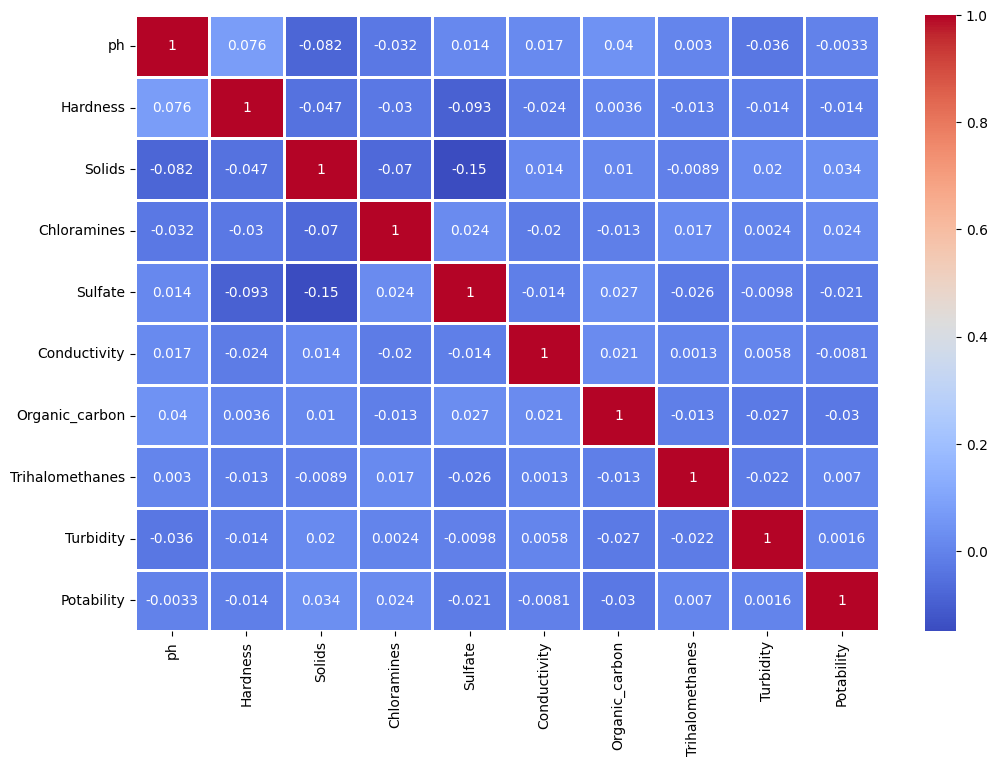

In [6]:
# plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

### More context on Correlation

#### What is correlation?
    Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

#### Correlations describe data moving together

    - Positive r values indicate a positive correlation, where the values of both variables tend to increase together.
    - Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.


## DATA ANALYSIS

NB: This more context will help you understand more how to read this Correlation map.

My conlusion: Generally our features have a negative correlation with each other, meaning if one feature increase the other tends to decrease and vice versa.


## Get the target and the features of the data

In the data set, we will go ahead to extract the features of the columns and at the same time get the target features in our case the Potability column.

In [7]:
# split the data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Display the X features
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


## Data Normalization

Normalisation, which involves reshaping numerical columns to conform to a standard scale, is essential for datasets with different units or magnitudes across different features. Finding a common scale for the data while maintaining the intrinsic variations in value ranges is the main goal of normalization. This usually entails rescaling the features to a standard range, which is typically between 0 and 1. Alternatively, the features can be adjusted to have a mean of 0 and a standard deviation of 1.

### Standard Scaler

Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format.

it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. 

This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

In [8]:
# make it a function for reusability
scaler = StandardScaler()

def normalize_data(X):
    normalized_data = scaler.fit_transform(X)
    return normalized_data

# normalize the X features only
# there is no need to normalize the target since it is binary (0, 1)
X_normalized = normalize_data(X)

# print the normalized data
print(X_normalized[:5])

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01  1.12414846e-01
   9.61357416e-01  1.70895423e+00 -1.18065057e+00  1.30614943e+00
  -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 -3.07693708e-01
   3.14598714e-15  2.06257500e+00  2.70597240e-01 -6.38479983e-01
   6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01  1.36059386e+00
   3.14598714e-15 -9.40321148e-02  7.81116857e-01  1.50940884e-03
  -1.16736546e+00]
 [ 8.40950402e-01  5.47651374e-01  4.93304442e-04  5.92007821e-01
   6.39518996e-01 -7.78829962e-01  1.25513443e+00  2.15287376e+00
   8.48411520e-01]
 [ 1.36856889e+00 -4.64429087e-01 -4.60248570e-01 -3.63697933e-01
  -6.54176512e-01 -3.43938909e-01 -8.24357169e-01 -2.18159864e+00
   1.38785531e-01]]


## Split the data into training and testing sets

In summary, training, testing, and validation sets serve distinct purposes in machine learning. 
 - The training set is used to train the model; 
 - the test set evaluates its performance on unseen data; 
 - and the validation set aids in model selection and hyperparameter tuning.

In [9]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# print the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

print('')
print('')

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# print the shape of the training and validation sets
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)
y_train shape:  (2620,)
y_test shape:  (656,)


X_train shape:  (2096, 9)
X_val shape:  (524, 9)
y_train shape:  (2096,)
y_val shape:  (524,)


## Building a Neural Network for Binary Classification using tensorflow

In the next cell, we define a function neural_net that constructs and compiles a neural network model using the TensorFlow Keras API.
The function takes an optional parameter regularizer, which allows us to apply regularization to the Dense layers in the network.

In [10]:
# create the model function that takes in a regularizer
def neural_network(regularize=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(90, activation='relu', kernel_regularizer=regularize),
        tf.keras.layers.Dense(45, activation='relu', kernel_regularizer=regularize),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

### Create an instance of our model without repularization

In [11]:
unregularized_model = neural_network()
unregularized_model.summary()

/Users/macbook2015/ml/Aqua_Rescan/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 90)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,041 (19.69 KB)

 Trainable params: 5,041 (19.69 KB)

 Non-trainable params: 0 (0.00 B)

### Train the unregularized data

In [12]:
# train the model
history = unregularized_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5725 - loss: 0.6829 - val_accuracy: 0.6145 - val_loss: 0.6612
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6217 - loss: 0.6503 - val_accuracy: 0.6412 - val_loss: 0.6374
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.6176 - val_accuracy: 0.6584 - val_loss: 0.6202
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.6145 - val_accuracy: 0.6813 - val_loss: 0.6077
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5978 - val_accuracy: 0.6698 - val_loss: 0.6054
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5862 - val_accuracy: 0.6698 - val_loss: 0.6060
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5759 - val_accuracy: 0.6851 - val_loss: 0.5990
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5713 - val_accuracy: 0.6698 - v

### Analyze the training loss and accuracy against the validation loss and accuracy

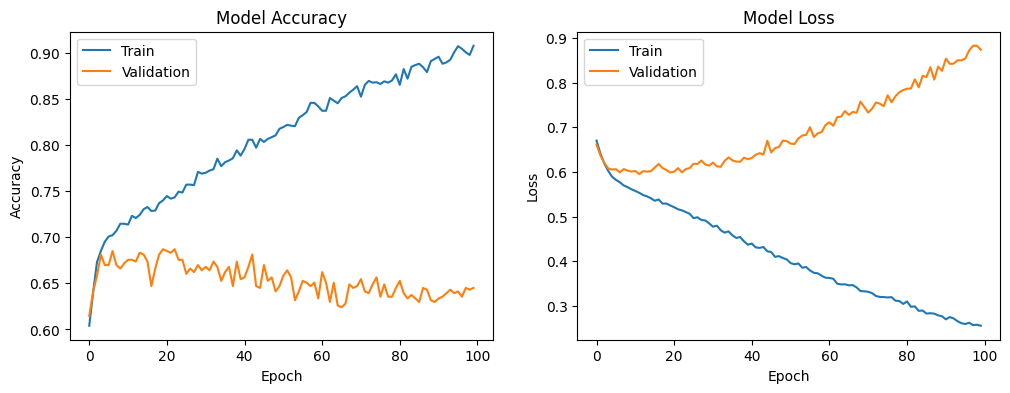

In [13]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

## Overfitting

Our model is doing quit bad. why?

the model is too accurate with a percantage of 91% accuracy on the training data but this accuracy decreases to 66% when it is introduced to the new data in this case which the validation data. 

Also the same pattern in found with the loss, where the training set has a loss of 0.21 but the validation loss is 0.84. 

the extensive differences between the accuracy and loss of the respective training and validation data suggests what we can an overfitting. 

Which means just at its name suggest, our model is fitting a little bit too much on our training model, it is learning the data other that learning the pattern between the data. which is why it doing very good on this data it used for training but does bad when it comes to new data.

#### So how do deal with overfitting? 

## We introduce regularization. 

- First L2 Regularization 
 
   - implement regularization to the model to penalize large weights and prevent overfitting

In [14]:
# L2 regularization
regularizer = tf.keras.regularizers.l2(0.01)
regularized_model = neural_network(regularize=regularizer)

# train the model
history = regularized_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6002 - loss: 1.3455 - val_accuracy: 0.6126 - val_loss: 1.0849
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6241 - loss: 1.0188 - val_accuracy: 0.6336 - val_loss: 0.8885
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.8568 - val_accuracy: 0.6393 - val_loss: 0.7817
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.7577 - val_accuracy: 0.6489 - val_loss: 0.7253
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.7102 - val_accuracy: 0.6489 - val_loss: 0.6927
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.6795 - val_accuracy: 0.6660 - val_loss: 0.6758
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.6649 - val_accuracy: 0.6660 - val_loss: 0.6630
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.6478 - val_accuracy: 0.6718 - v

### Analyze the training loss and accuracy against the validation loss and accuracy
### After Introducing Regularization

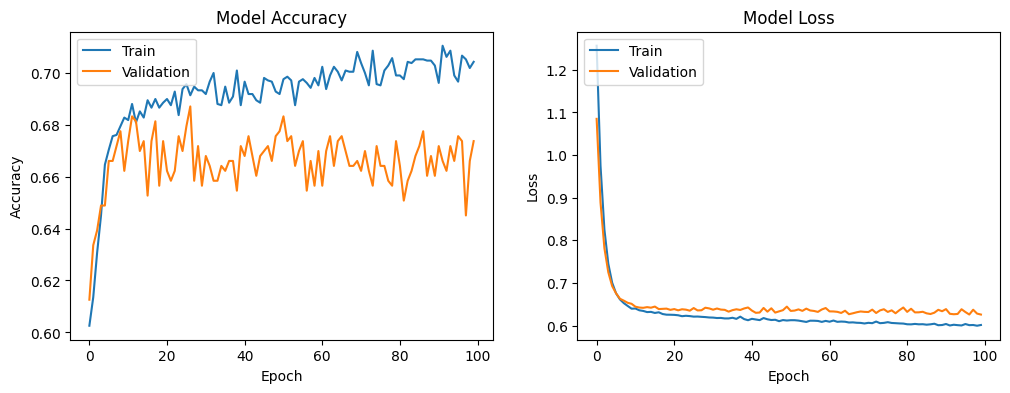

In [15]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

The results show some improvement with L2 regularization, but there is still a noticeable gap between the training and validation performance, indicating that overfitting might still be present.

While L2 regularization has helped, we will go furthet to consider additional strategies to further mitigate overfitting. Combining multiple strategies often yields better results.

## Introducing Drop Out 

Dropout is a regularization technique for neural networks that drops a unit (along with connections) at training time with a specified probability p.

The idea is to prevent co-adaptation, where the neural network becomes too reliant on particular connections, as this could be symptomatic of overfitting.

In [16]:
# Define a model with L2 and dropout regularization
def neural_network_2(regularize=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(90, activation='relu', kernel_regularizer=regularize),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(45, activation='relu', kernel_regularizer=regularize),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

# L2 regularization
regularizer = tf.keras.regularizers.l2(0.01)
regularized_model_2 = neural_network_2(regularize=regularizer)

# train the model
history = regularized_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5396 - loss: 1.4119 - val_accuracy: 0.6126 - val_loss: 1.1889
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5883 - loss: 1.1580 - val_accuracy: 0.6107 - val_loss: 1.0260
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 1.0049 - val_accuracy: 0.6240 - val_loss: 0.9206
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5802 - loss: 0.9189 - val_accuracy: 0.6164 - val_loss: 0.8441
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6168 - loss: 0.8348 - val_accuracy: 0.6260 - val_loss: 0.7920
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6135 - loss: 0.7883 - val_accuracy: 0.6317 - val_loss: 0.7545
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6165 - loss: 0.7575 - val_accuracy: 0.6240 - val_loss: 0.7269
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6322 - loss: 0.7188 - val_accuracy: 0.6412 - v

Comments: This model is doing really fine with our training and validation accuracies having a difference of 0.0002 and those of losses being 0.0041.

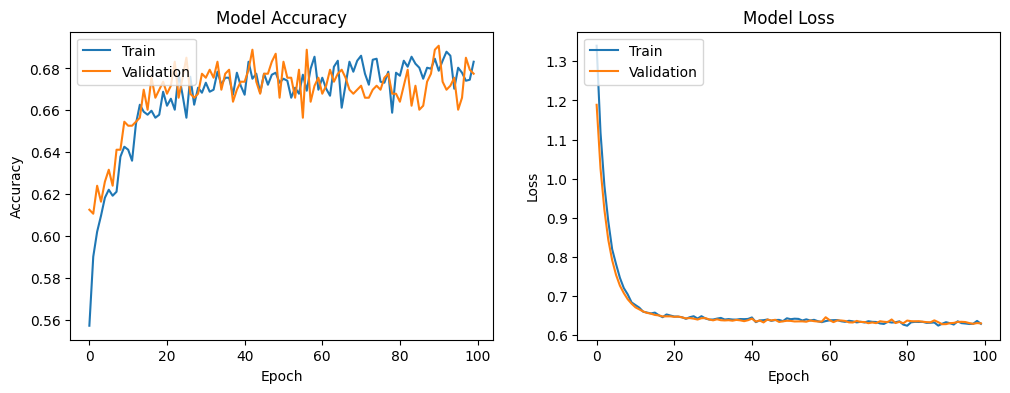

In [17]:
# plot the training and validation accuracy after adding dropout

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

## Introducing Early Stopping

## Introducing Confusion Matrix